# Exploratory Data Analysis (EDA)
## Image Colorization using GAN

This notebook contains comprehensive data analysis for the image colorization project.

In [1]:
import os
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## 1. Dataset Overview

In [2]:
# Load dataset
DATA_DIR = '../data/train'

# Get all image files
valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.webp'}
image_files = [f for f in os.listdir(DATA_DIR) 
               if os.path.splitext(f)[1].lower() in valid_extensions]

print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Dataset Directory: {DATA_DIR}")
print(f"Total Images: {len(image_files)}")
print(f"Image Formats: {Counter([os.path.splitext(f)[1].lower() for f in image_files])}")

DATASET OVERVIEW
Dataset Directory: ../data/train
Total Images: 100
Image Formats: Counter({'.jpg': 100})


## 2. Chart 1: Sample Images Visualization

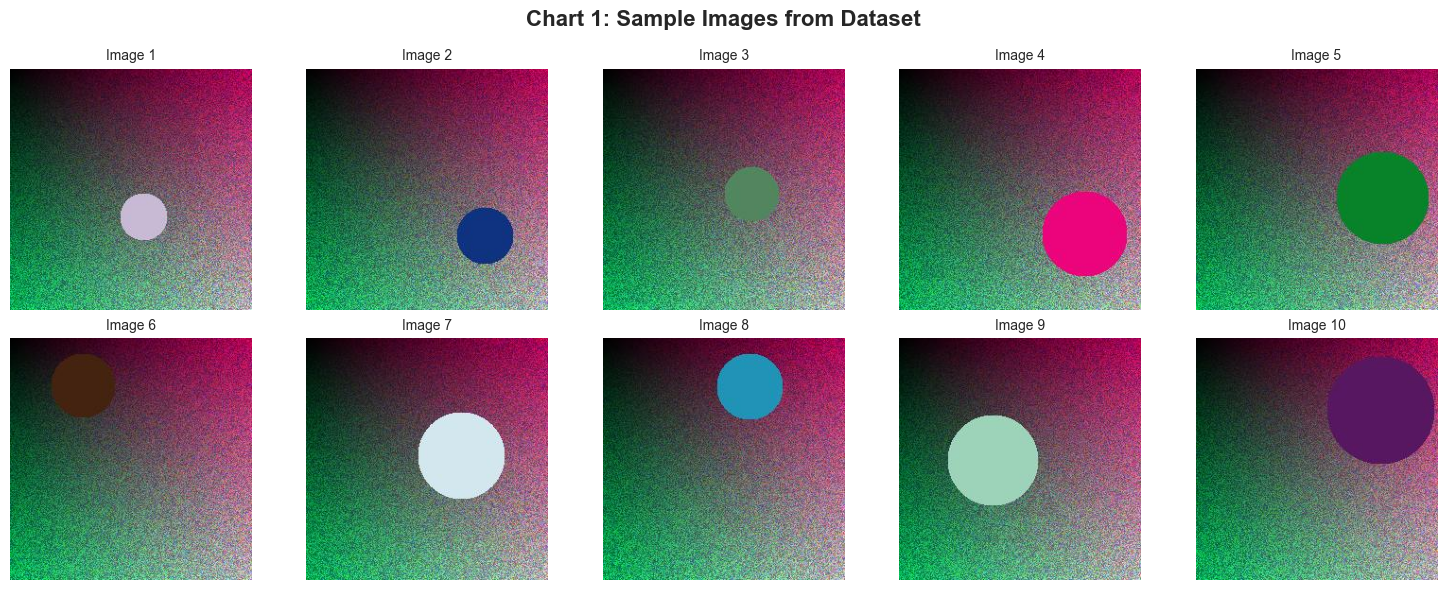

In [3]:
# Chart 1: Display sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Chart 1: Sample Images from Dataset', fontsize=16, fontweight='bold')

for idx, ax in enumerate(axes.flat):
    if idx < len(image_files):
        img_path = os.path.join(DATA_DIR, image_files[idx])
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(f'Image {idx+1}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig('../results/plots/chart1_sample_images.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Chart 2: Image Size Distribution

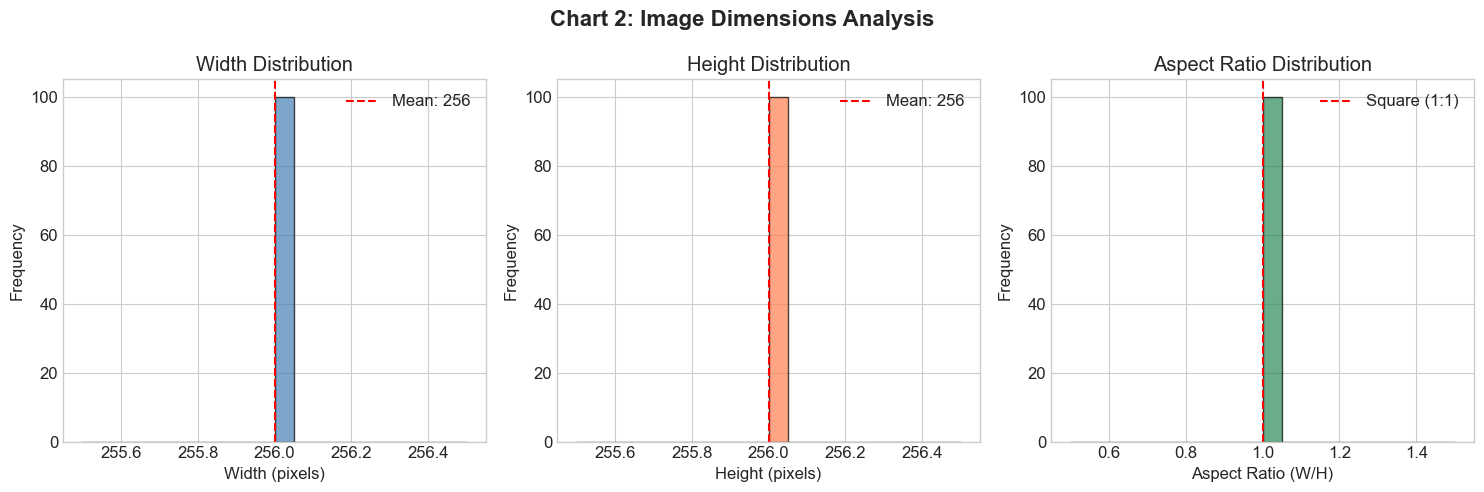


Statistics:
Width  - Min: 256, Max: 256, Mean: 256.0
Height - Min: 256, Max: 256, Mean: 256.0


In [4]:
# Chart 2: Image dimensions analysis
widths = []
heights = []
aspect_ratios = []

for img_file in image_files:
    img_path = os.path.join(DATA_DIR, img_file)
    img = Image.open(img_path)
    w, h = img.size
    widths.append(w)
    heights.append(h)
    aspect_ratios.append(w/h)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Chart 2: Image Dimensions Analysis', fontsize=16, fontweight='bold')

# Width distribution
axes[0].hist(widths, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Width Distribution')
axes[0].axvline(np.mean(widths), color='red', linestyle='--', label=f'Mean: {np.mean(widths):.0f}')
axes[0].legend()

# Height distribution
axes[1].hist(heights, bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Height Distribution')
axes[1].axvline(np.mean(heights), color='red', linestyle='--', label=f'Mean: {np.mean(heights):.0f}')
axes[1].legend()

# Aspect ratio
axes[2].hist(aspect_ratios, bins=20, color='seagreen', edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Aspect Ratio (W/H)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Aspect Ratio Distribution')
axes[2].axvline(1.0, color='red', linestyle='--', label='Square (1:1)')
axes[2].legend()

plt.tight_layout()
plt.savefig('../results/plots/chart2_image_dimensions.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nStatistics:")
print(f"Width  - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.1f}")
print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.1f}")

## 4. Chart 3: Color Channel Distribution (RGB)

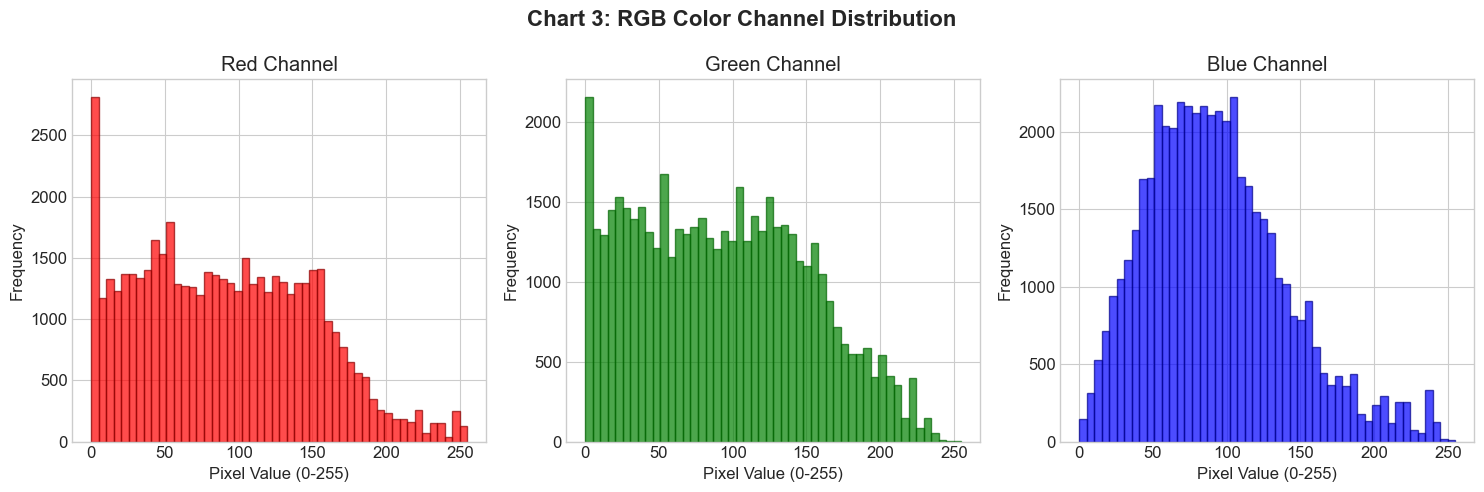

In [5]:
# Chart 3: RGB Color Distribution
r_values = []
g_values = []
b_values = []

# Sample pixels from images
for img_file in image_files[:50]:  # Sample from first 50 images
    img_path = os.path.join(DATA_DIR, img_file)
    img = np.array(Image.open(img_path).convert('RGB'))
    
    # Sample 1000 random pixels
    flat = img.reshape(-1, 3)
    samples = flat[np.random.choice(len(flat), min(1000, len(flat)), replace=False)]
    
    r_values.extend(samples[:, 0])
    g_values.extend(samples[:, 1])
    b_values.extend(samples[:, 2])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Chart 3: RGB Color Channel Distribution', fontsize=16, fontweight='bold')

axes[0].hist(r_values, bins=50, color='red', alpha=0.7, edgecolor='darkred')
axes[0].set_xlabel('Pixel Value (0-255)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Red Channel')

axes[1].hist(g_values, bins=50, color='green', alpha=0.7, edgecolor='darkgreen')
axes[1].set_xlabel('Pixel Value (0-255)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Green Channel')

axes[2].hist(b_values, bins=50, color='blue', alpha=0.7, edgecolor='darkblue')
axes[2].set_xlabel('Pixel Value (0-255)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Blue Channel')

plt.tight_layout()
plt.savefig('../results/plots/chart3_rgb_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Chart 4: LAB Color Space Distribution

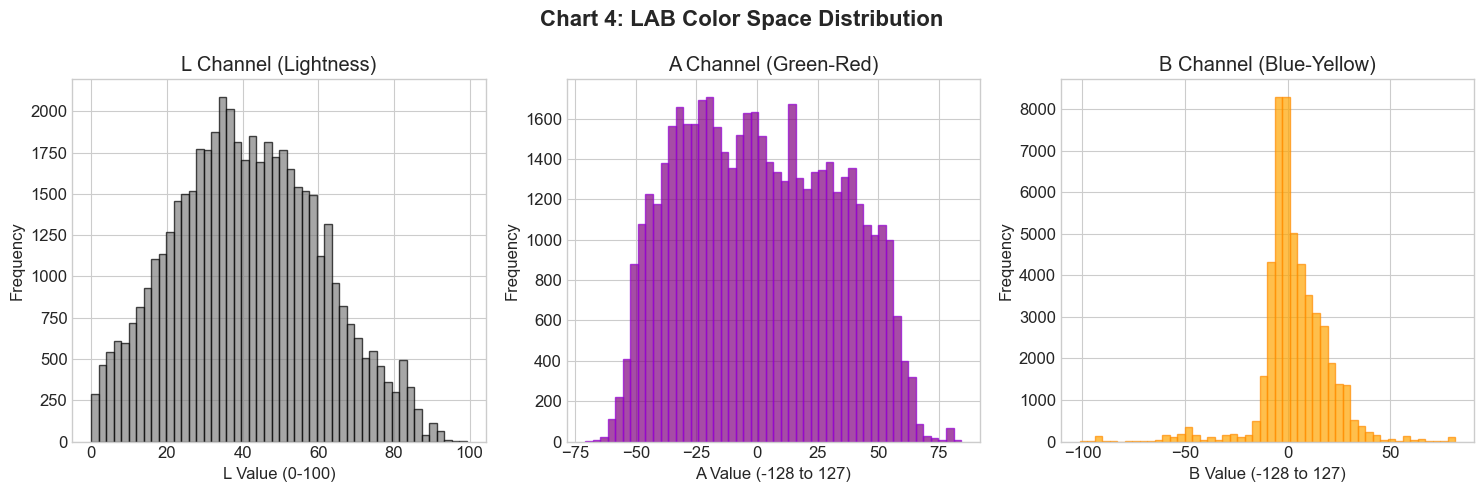


LAB Statistics:
L - Min: 0.0, Max: 99.3, Mean: 41.3
A - Min: -70.9, Max: 84.3, Mean: 1.5
B - Min: -101.4, Max: 81.7, Mean: 3.4


In [7]:
# Chart 4: LAB Color Space Distribution
from src.utils.color_conversion import rgb2lab

L_values = []
A_values = []
B_values = []

for img_file in image_files[:50]:
    img_path = os.path.join(DATA_DIR, img_file)
    img = np.array(Image.open(img_path).convert('RGB'))
    lab = rgb2lab(img)
    
    # Sample pixels
    flat = lab.reshape(-1, 3)
    samples = flat[np.random.choice(len(flat), min(1000, len(flat)), replace=False)]
    
    L_values.extend(samples[:, 0])
    A_values.extend(samples[:, 1])
    B_values.extend(samples[:, 2])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Chart 4: LAB Color Space Distribution', fontsize=16, fontweight='bold')

axes[0].hist(L_values, bins=50, color='gray', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('L Value (0-100)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('L Channel (Lightness)')

axes[1].hist(A_values, bins=50, color='purple', alpha=0.7, edgecolor='darkviolet')
axes[1].set_xlabel('A Value (-128 to 127)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('A Channel (Green-Red)')

axes[2].hist(B_values, bins=50, color='orange', alpha=0.7, edgecolor='darkorange')
axes[2].set_xlabel('B Value (-128 to 127)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('B Channel (Blue-Yellow)')

plt.tight_layout()
plt.savefig('../results/plots/chart4_lab_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nLAB Statistics:")
print(f"L - Min: {min(L_values):.1f}, Max: {max(L_values):.1f}, Mean: {np.mean(L_values):.1f}")
print(f"A - Min: {min(A_values):.1f}, Max: {max(A_values):.1f}, Mean: {np.mean(A_values):.1f}")
print(f"B - Min: {min(B_values):.1f}, Max: {max(B_values):.1f}, Mean: {np.mean(B_values):.1f}")

## 6. Chart 5: Grayscale vs Color Comparison

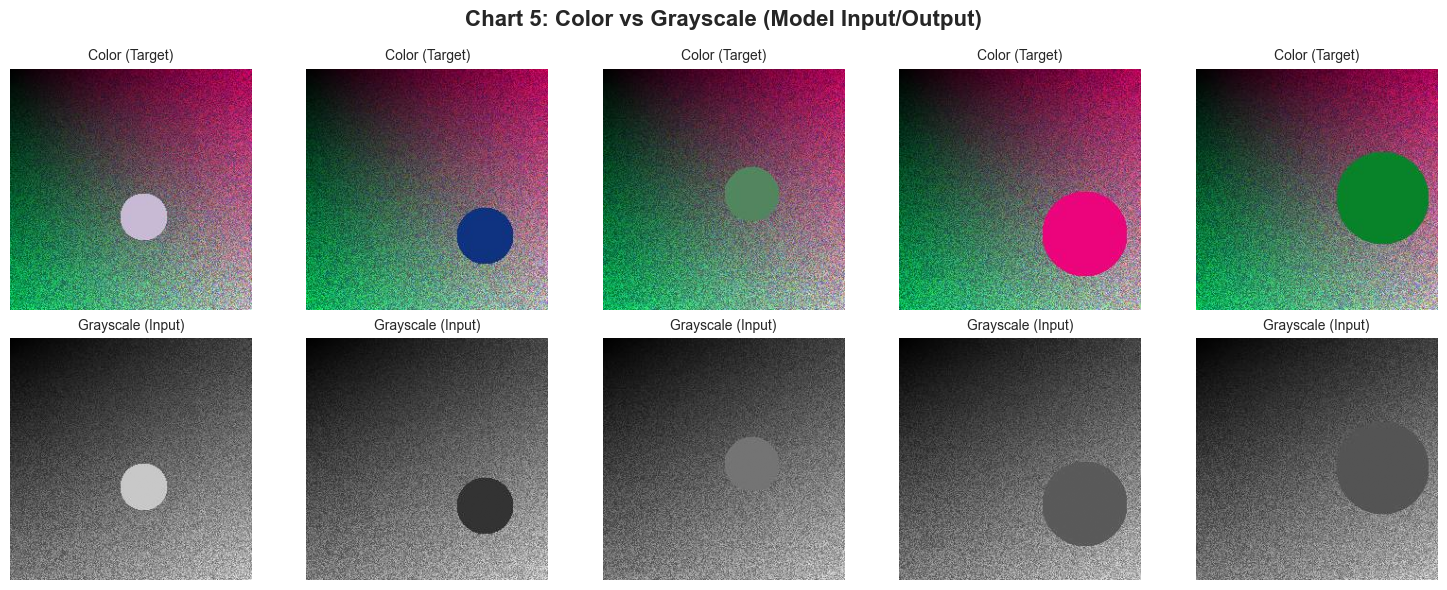

In [8]:
# Chart 5: Original vs Grayscale Comparison
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Chart 5: Color vs Grayscale (Model Input/Output)', fontsize=16, fontweight='bold')

for idx in range(5):
    img_path = os.path.join(DATA_DIR, image_files[idx])
    img = Image.open(img_path).convert('RGB')
    gray = img.convert('L')
    
    # Original color
    axes[0, idx].imshow(img)
    axes[0, idx].set_title(f'Color (Target)', fontsize=10)
    axes[0, idx].axis('off')
    
    # Grayscale
    axes[1, idx].imshow(gray, cmap='gray')
    axes[1, idx].set_title(f'Grayscale (Input)', fontsize=10)
    axes[1, idx].axis('off')

axes[0, 0].set_ylabel('Ground Truth', fontsize=12)
axes[1, 0].set_ylabel('Model Input', fontsize=12)

plt.tight_layout()
plt.savefig('../results/plots/chart5_color_vs_grayscale.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Chart 6: Image Brightness Distribution

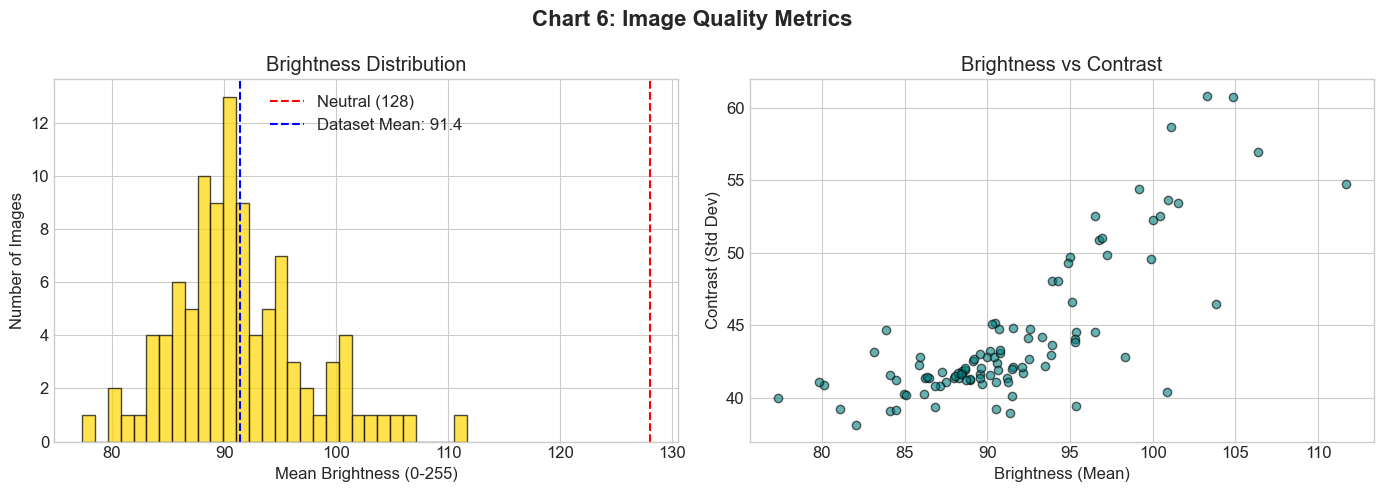


Brightness Statistics:
Mean Brightness: 91.4
Mean Contrast: 44.1


In [9]:
# Chart 6: Brightness Analysis
brightness_values = []
contrast_values = []

for img_file in image_files:
    img_path = os.path.join(DATA_DIR, img_file)
    img = np.array(Image.open(img_path).convert('L'))  # Grayscale
    
    brightness = np.mean(img)
    contrast = np.std(img)
    
    brightness_values.append(brightness)
    contrast_values.append(contrast)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Chart 6: Image Quality Metrics', fontsize=16, fontweight='bold')

# Brightness histogram
axes[0].hist(brightness_values, bins=30, color='gold', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Mean Brightness (0-255)')
axes[0].set_ylabel('Number of Images')
axes[0].set_title('Brightness Distribution')
axes[0].axvline(128, color='red', linestyle='--', label='Neutral (128)')
axes[0].axvline(np.mean(brightness_values), color='blue', linestyle='--', 
                label=f'Dataset Mean: {np.mean(brightness_values):.1f}')
axes[0].legend()

# Brightness vs Contrast scatter
axes[1].scatter(brightness_values, contrast_values, alpha=0.6, c='teal', edgecolor='black')
axes[1].set_xlabel('Brightness (Mean)')
axes[1].set_ylabel('Contrast (Std Dev)')
axes[1].set_title('Brightness vs Contrast')

plt.tight_layout()
plt.savefig('../results/plots/chart6_brightness_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nBrightness Statistics:")
print(f"Mean Brightness: {np.mean(brightness_values):.1f}")
print(f"Mean Contrast: {np.mean(contrast_values):.1f}")

## 8. Chart 7: Color Histogram per Channel

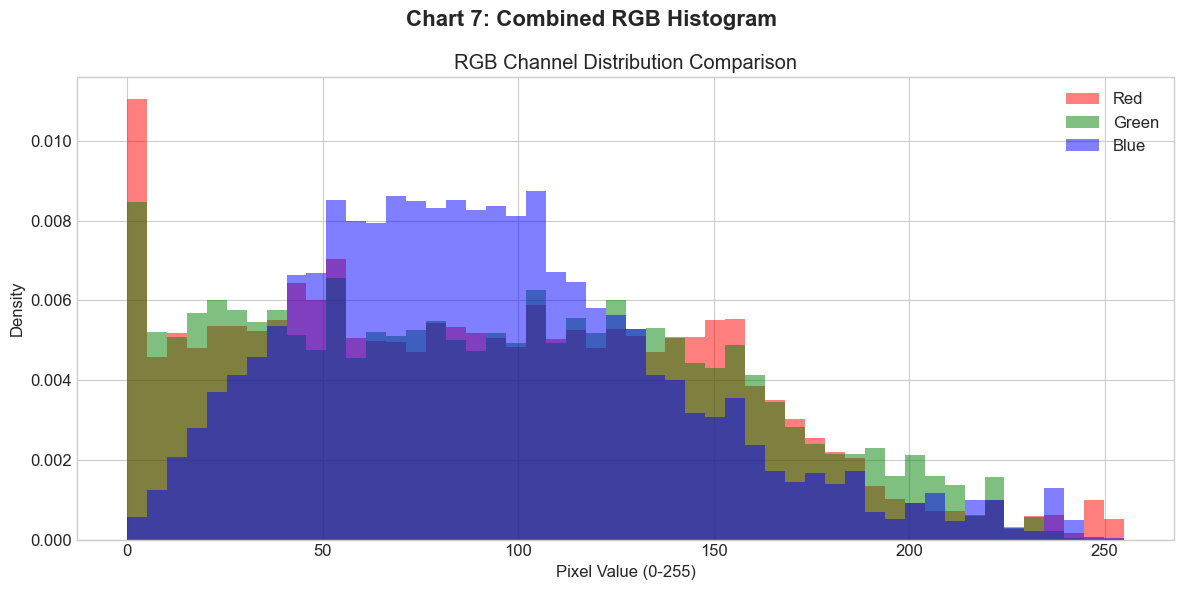

In [10]:
# Chart 7: Combined RGB Histogram
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Chart 7: Combined RGB Histogram', fontsize=16, fontweight='bold')

ax.hist(r_values, bins=50, color='red', alpha=0.5, label='Red', density=True)
ax.hist(g_values, bins=50, color='green', alpha=0.5, label='Green', density=True)
ax.hist(b_values, bins=50, color='blue', alpha=0.5, label='Blue', density=True)

ax.set_xlabel('Pixel Value (0-255)')
ax.set_ylabel('Density')
ax.set_title('RGB Channel Distribution Comparison')
ax.legend()

plt.tight_layout()
plt.savefig('../results/plots/chart7_rgb_combined.png', dpi=150, bbox_inches='tight')
plt.show()

## 9. Dataset Summary

In [11]:
# Dataset Summary Table
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"{'Property':<30} {'Value':<30}")
print("-"*60)
print(f"{'Total Images':<30} {len(image_files)}")
print(f"{'Image Format':<30} {'JPEG'}")
print(f"{'Image Size':<30} {'256 x 256 pixels'}")
print(f"{'Color Space':<30} {'RGB (converted to LAB)'}")
print(f"{'Mean Brightness':<30} {np.mean(brightness_values):.1f}")
print(f"{'Mean Contrast':<30} {np.mean(contrast_values):.1f}")
print(f"{'Data Type':<30} {'Synthetic Images'}")
print("="*60)

print("\n" + "="*60)
print("IDENTIFIED ISSUES")
print("="*60)
print("1. Synthetic data - limited to gradient patterns")
print("2. Small dataset size (100 images)")
print("3. No real-world objects/scenes")
print("4. Limited color diversity")
print("="*60)

DATASET SUMMARY
Property                       Value                         
------------------------------------------------------------
Total Images                   100
Image Format                   JPEG
Image Size                     256 x 256 pixels
Color Space                    RGB (converted to LAB)
Mean Brightness                91.4
Mean Contrast                  44.1
Data Type                      Synthetic Images

IDENTIFIED ISSUES
1. Synthetic data - limited to gradient patterns
2. Small dataset size (100 images)
3. No real-world objects/scenes
4. Limited color diversity


## 10. Conclusions

### Key Findings:
1. **Dataset Size**: 100 synthetic images for demonstration
2. **Image Dimensions**: All images are 256x256 pixels
3. **Color Distribution**: Gradient-based with geometric shapes
4. **LAB Color Space**: Suitable for separating luminance from chrominance

### Recommendations:
1. Use larger real-world dataset for production
2. Apply data augmentation during training
3. Consider transfer learning from pre-trained models